In [2]:
library(sceasy)
library(reticulate)
loompy <- reticulate::import('loompy')
library(Seurat)

Loading required package: reticulate

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
Pvit <- readRDS("lizard.rds")

In [4]:
Pvit <- UpdateSeuratObject(Pvit)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Graph RNA_nn changing from Graph to Graph”
Warning message:
“Graph RNA_snn changing from Graph to Graph”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for NormalizeData.RNA to RNA

Setting assay used for FindVariableFeatures.RNA to RNA

Setting assay used for ScaleData.RNA to RNA

Setting assay used f

In [5]:
dim(Pvit)
# there are some tRNA there
rownames(Pvit)[1:10]

[1]  21217 285483

[1] "tRNA-Phe" "rRNA-12S" "tRNA-Val" "rRNA-16S" "tRNA-Leu" "ND1"     
 [7] "tRNA-Gln" "tRNA-Ile" "tRNA-Met" "ND2"

In [6]:
# all neurons info, subclustering, and annotations
info <- read.csv("Pogona_vitticeps_neurons_metadata_Science_2022.csv", header = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



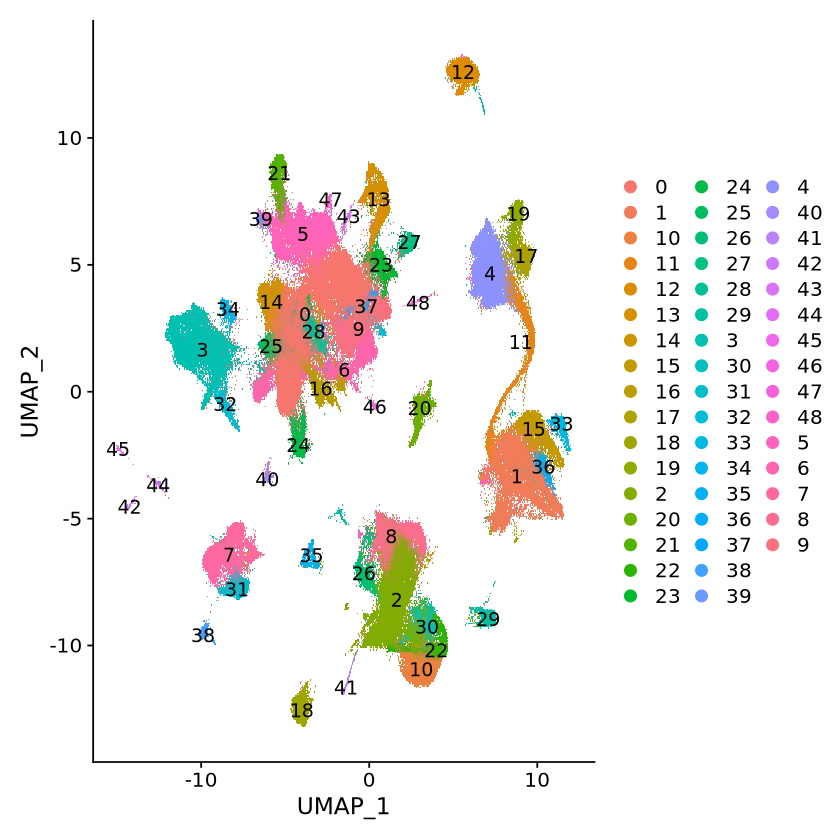

In [7]:
Idents(Pvit) <- "RNA_snn_res.0.5"
DimPlot(Pvit, label = T)

In [8]:
Pvit@meta.data$Taxonomy2 <- "NEUR"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(4,17,19) ), "Taxonomy2"] <- "OPC"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(11) ), "Taxonomy2"] <- "DIFF-OPC"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(1,15,33,36) ), "Taxonomy2"] <- "OLIG"

Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(29) ), "Taxonomy2"] <- "EG-CB"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(2,10,22,30,8,16) ), "Taxonomy2"] <- "EG"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(41) ), "Taxonomy2"] <- "CH-P"

Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(18) ), "Taxonomy2"] <- "SCO"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(35) ), "Taxonomy2"] <- "CYCL-CEL"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(38) ), "Taxonomy2"] <- "JCHAIN"

Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(7,31) ), "Taxonomy2"] <- "MCGLIA"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(44) ), "Taxonomy2"] <- "VSMC"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(42) ), "Taxonomy2"] <- "VEND"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(45) ), "Taxonomy2"] <- "END"

Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(48) ), "Taxonomy2"] <- "RBC"
Pvit@meta.data[which(Pvit@meta.data$RNA_snn_res.0.5 %in% c(32) ), "Taxonomy2"] <- "NPC"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



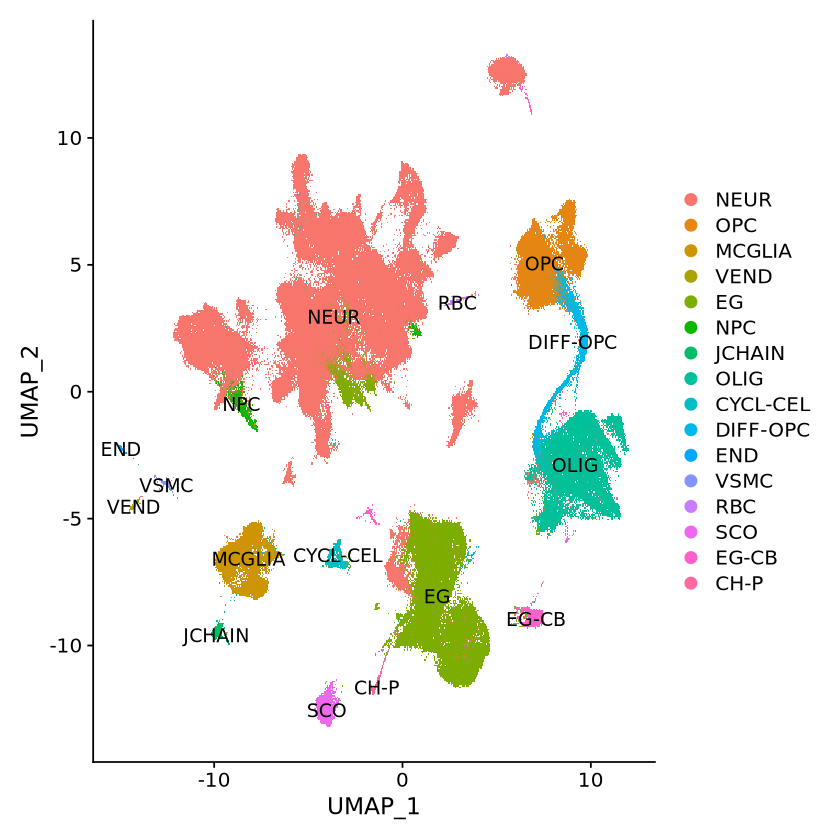

In [9]:
Idents(Pvit) <- "Taxonomy2"
DimPlot(Pvit, label = T)

In [10]:
Pvit@meta.data$Taxonomy1 <- "non-neurons"
Pvit@meta.data[which(Pvit@meta.data$Taxonomy2 == "NEUR"), "Taxonomy1"] <- "neurons"

In [11]:
Pvit@meta.data$Region <- Pvit@meta.data$region

In [12]:
Pvit@meta.data$Taxonomy3 <- info[match(colnames(Pvit), info$X), "cluster_annotation"]
Pvit@meta.data[which(is.na(Pvit@meta.data$Taxonomy3)), "Taxonomy3"] <- Pvit@meta.data[which(is.na(Pvit@meta.data$Taxonomy3)), "Taxonomy2"]

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



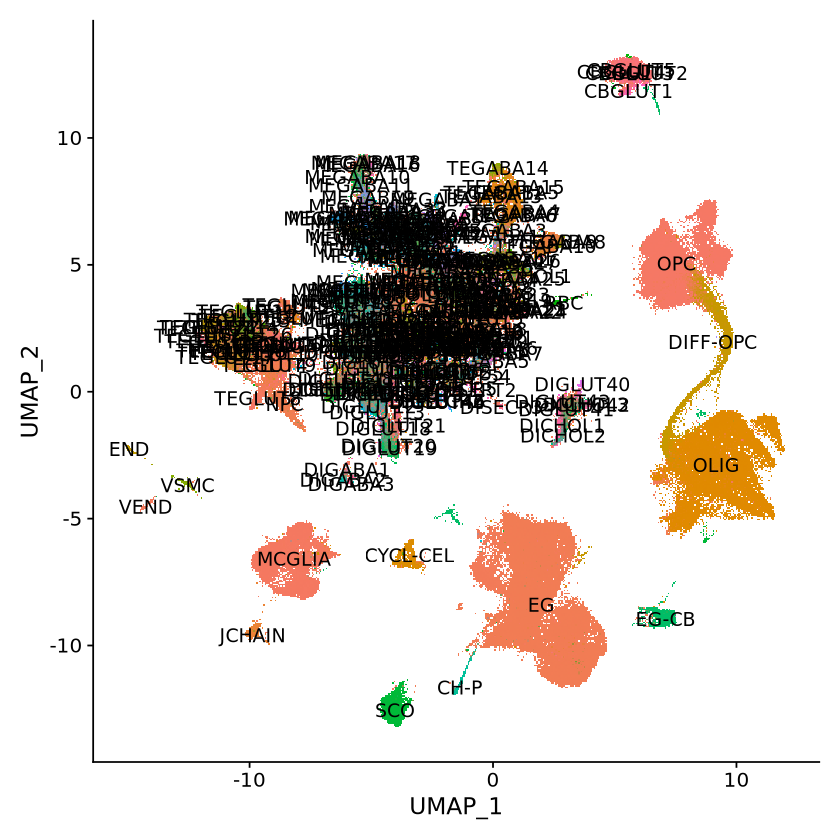

In [13]:
Idents(Pvit) <- "Taxonomy3"
DimPlot(Pvit, label = T) + NoLegend()

In [15]:
Pvit@meta.data$DonorID <- substr(Pvit@meta.data$orig.ident, 1, 3)

In [16]:
#saveRDS(Pvit, file = "lizard.add_info_with_ncRNA.rds")

In [17]:
Pvit_count <- GetAssayData(object = Pvit, assay = "RNA", slot = "counts")
Pvit_pep_ID <- read.table("../../../02.atlas/v_adata/Pvit_pep.ID", header =F)$V1
# show non-coding genes of Pmar, need to removed
nc <- gsub("-","_", rownames(Pvit_count))[!gsub("-","_", rownames(Pvit_count)) %in% 
                                          gsub("-","_", Pvit_pep_ID)]

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [18]:
Pvit_count <- Pvit_count[!gsub("-","_", rownames(Pvit_count)) %in% nc,]
dim(Pvit_count)
Pvit_new_atlas <- CreateSeuratObject(counts = Pvit_count, meta.data = Pvit@meta.data)
Pvit_new_atlas[["RNA"]] <- as(Pvit_new_atlas[["RNA"]], "Assay")

[1]  18891 285483

Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“Layer ‘data’ is empty”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”
Warning message:
“Layer ‘scale.data’ is empty”
Warning message:
“Assay RNA changing from Assay5 to Assay”


In [19]:
# downsample to 10k neurons and 10k non-neurons with seed 42
set.seed(42)
ID1 <- sample(colnames(Pvit_new_atlas)[which(Pvit_new_atlas@meta.data$Taxonomy1 == 'neurons')], size = 100000)
ID2 <- sample(colnames(Pvit_new_atlas)[which(Pvit_new_atlas@meta.data$Taxonomy1 != 'neurons')], size = 100000)
Pvit_new_atlas <- subset(Pvit_new_atlas, cells = c(ID1,ID2))

In [20]:
dim(Pvit_new_atlas)

[1]  18891 200000

In [21]:
sceasy::convertFormat(Pvit_new_atlas, main_layer = "count", from="seurat", to="anndata",
                       outFile='Pvit.subset.100k_neurons_100k_others.h5ad')

Warning message in .regularise_df(obj@meta.data, drop_single_values = drop_single_values):
“Dropping single category variables:svm_class”


AnnData object with n_obs × n_vars = 200000 × 18891
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'animal', 'region', 'chemistry', 'percent.mito', 'percent.rRNA_mito', 'RNA_snn_res.0.2', 'seurat_clusters', 'ypred', 'RNA_snn_res.0.5', 'Taxonomy2', 'Taxonomy1', 'Region', 'Taxonomy3', 'DonorID'
    var: 'name'